In [ ]:
'''
Time Series Data Analysis
Problem statement: Analysis and Visualization of Stock Market Data
Dataset: &quot;Stock_Prices.csv&quot;
Description: The dataset contains historical stock price data for a particular company
over a
period of time. It includes attributes such as date, closing price, volume, and other
relevant
features. The goal is to perform time series data analysis on the stock price data to
identify
trends, patterns, and potential predictors, as well as build models to forecast future stock
prices.
Tasks to Perform:
1. Import the &quot;Stock_Prices.csv&quot; dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time
series
analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over
time.
5. Calculate and plot moving averages or rolling averages to identify the underlying
trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as
weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as
trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential
smoothing models to forecast future stock prices.
'''
None

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 1. Import the Stock_Prices.csv dataset.
data = pd.read_csv('stock_prices.csv')
data

,Date,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZION,ZNGA
0,2003-07-31,13.790836,53.019848,1.019303,NaN,12.739487,9.022574,15.108545,16.333433,26.962475,...,7.946304,53.450195,19.403030,24.283438,20.140688,23.011992,NaN,8.275629,46.391441,NaN
1,2003-08-01,13.676599,51.759747,1.002379,NaN,12.579965,8.859362,15.816516,16.268559,28.070812,...,7.858501,50.491951,19.898077,24.112812,19.770533,22.692390,NaN,8.272863,46.557457,NaN
2,2003-08-04,13.682946,52.256149,1.025589,NaN,12.398233,8.850165,15.660917,16.523066,28.227112,...,7.803621,51.500431,19.838972,24.303909,19.728891,21.605703,NaN,8.239684,46.673660,NaN
3,2003-08-05,13.219654,51.206055,0.985455,NaN,12.111500,8.700747,15.147444,16.183720,27.132978,...,7.699356,51.856777,19.225708,24.126451,19.405010,21.605703,NaN,8.167795,46.325050,NaN
4,2003-08-06,13.060995,50.783653,0.949190,NaN,11.752071,8.873152,14.937387,15.749559,27.175615,...,7.748745,52.643398,19.151808,24.399456,19.423517,21.818781,NaN,8.037839,46.648762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2009-02-05,13.013260,17.783228,9.328462,NaN,16.774483,18.540512,26.653465,20.910000,17.049383,...,13.254547,2.332806,14.617187,60.970043,25.528074,14.683539,NaN,17.316427,12.281530,NaN
1390,2009-02-06,12.999787,18.533386,9.643728,NaN,16.931742,18.743858,27.070309,21.700001,17.359655,...,13.359857,2.437380,14.928707,61.707390,25.642050,15.312531,NaN,17.783482,13.589288,NaN
1391,2009-02-09,12.824664,18.754021,9.913547,NaN,16.896797,18.776657,26.972231,21.420000,17.305361,...,13.205404,2.726970,14.673112,61.046875,25.357132,15.225769,NaN,17.907639,14.102448,NaN
1392,2009-02-10,12.299283,16.878618,9.460952,NaN,16.442490,18.297804,26.163061,20.480000,16.304739,...,12.812260,2.332806,14.201838,58.481464,24.568884,14.184690,NaN,17.085861,11.356082,NaN


In [6]:
# 2. Explore the dataset to understand its structure and content.
data.describe()

,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZION,ZNGA
count,1394.000000,1394.000000,1394.000000,0.0,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,0.0,1393.000000,1393.000000,0.0
mean,19.596211,62.298967,7.342148,NaN,15.905187,13.665619,24.125808,32.063244,25.948476,21.583265,...,12.071289,44.305087,20.407562,47.550654,28.584940,30.446848,NaN,15.214885,55.768069,NaN
std,4.123485,14.037416,5.176273,NaN,3.461708,2.820508,5.185327,8.263301,4.507295,7.706587,...,2.055872,14.982741,3.590706,13.576048,6.066698,5.427664,NaN,4.063368,14.657236,NaN
min,10.022634,14.793968,0.949190,NaN,10.145537,8.700747,14.937387,15.749559,12.335639,9.532207,...,7.699356,2.147791,11.572828,24.112812,19.363365,11.323040,NaN,7.935536,11.356082,NaN
25%,15.548798,57.128649,3.119440,NaN,12.310413,11.171171,19.511967,24.292500,23.767889,14.920811,...,10.245915,45.732262,18.550318,35.803394,24.408890,28.850222,NaN,12.717165,47.794594,NaN
50%,20.540412,62.272587,6.564543,NaN,16.607025,12.972653,22.901756,32.405001,26.266528,20.710686,...,11.763922,50.211006,20.171316,45.107918,26.625055,30.512205,NaN,14.351724,57.550632,NaN
75%,22.955065,70.734340,10.581798,NaN,18.837018,16.459382,28.894954,39.457500,28.057700,27.914155,...,13.889309,52.448158,21.691233,59.808388,33.938530,33.732353,NaN,18.309942,69.066071,NaN
max,27.211994,98.448463,19.325172,NaN,23.301603,19.033749,34.879265,48.000000,36.570755,38.052059,...,16.201385,63.200832,31.698027,71.487030,44.063076,42.401718,NaN,23.998205,78.929192,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Columns: 480 entries, Date to ZNGA
dtypes: float64(479), object(1)
memory usage: 5.1+ MB


In [8]:
#3. Ensure that the date column is in the appropriate format (e.g., datetime) for time
#series analysis.(Not required)
data['date'] = pd.to_datetime(data['Date'])
data.set_index('date', inplace=True)
data

,Date,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZION,ZNGA
date,,,,,,,,,,,,,,,,,,,,,
2003-07-31,2003-07-31,13.790836,53.019848,1.019303,NaN,12.739487,9.022574,15.108545,16.333433,26.962475,...,7.946304,53.450195,19.403030,24.283438,20.140688,23.011992,NaN,8.275629,46.391441,NaN
2003-08-01,2003-08-01,13.676599,51.759747,1.002379,NaN,12.579965,8.859362,15.816516,16.268559,28.070812,...,7.858501,50.491951,19.898077,24.112812,19.770533,22.692390,NaN,8.272863,46.557457,NaN
2003-08-04,2003-08-04,13.682946,52.256149,1.025589,NaN,12.398233,8.850165,15.660917,16.523066,28.227112,...,7.803621,51.500431,19.838972,24.303909,19.728891,21.605703,NaN,8.239684,46.673660,NaN
2003-08-05,2003-08-05,13.219654,51.206055,0.985455,NaN,12.111500,8.700747,15.147444,16.183720,27.132978,...,7.699356,51.856777,19.225708,24.126451,19.405010,21.605703,NaN,8.167795,46.325050,NaN
2003-08-06,2003-08-06,13.060995,50.783653,0.949190,NaN,11.752071,8.873152,14.937387,15.749559,27.175615,...,7.748745,52.643398,19.151808,24.399456,19.423517,21.818781,NaN,8.037839,46.648762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-05,2009-02-05,13.013260,17.783228,9.328462,NaN,16.774483,18.540512,26.653465,20.910000,17.049383,...,13.254547,2.332806,14.617187,60.970043,25.528074,14.683539,NaN,17.316427,12.281530,NaN
2009-02-06,2009-02-06,12.999787,18.533386,9.643728,NaN,16.931742,18.743858,27.070309,21.700001,17.359655,...,13.359857,2.437380,14.928707,61.707390,25.642050,15.312531,NaN,17.783482,13.589288,NaN
2009-02-09,2009-02-09,12.824664,18.754021,9.913547,NaN,16.896797,18.776657,26.972231,21.420000,17.305361,...,13.205404,2.726970,14.673112,61.046875,25.357132,15.225769,NaN,17.907639,14.102448,NaN


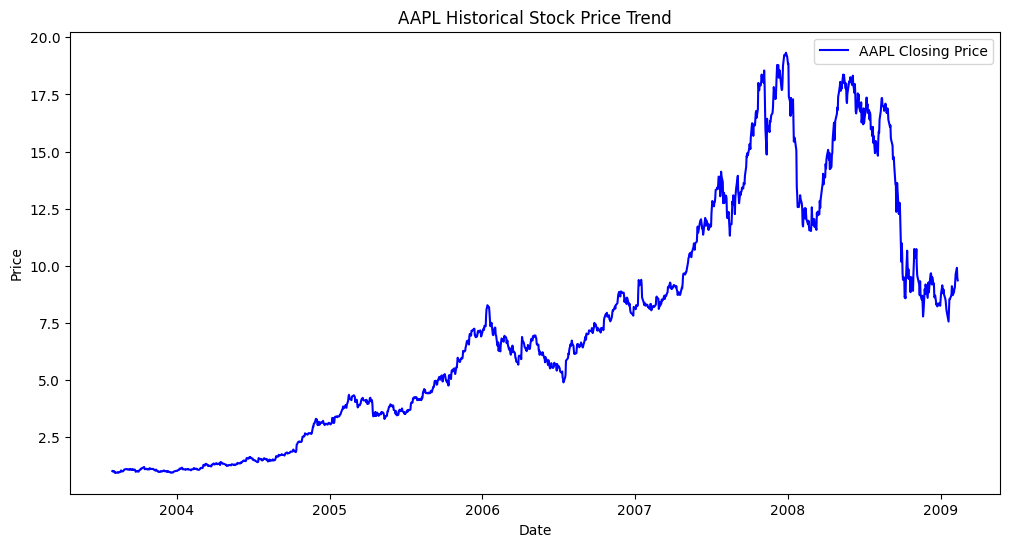

In [9]:
# 4. Plot line charts or time series plots to visualize the historical stock price trends over
# time.

company = 'AAPL'  # replace with the company symbol you want to analyze
df_company = data[[company]].dropna()  # dropping NaN values for the selected company

# 1. Visualize historical stock price trends for the chosen company
plt.figure(figsize=(12, 6))
plt.plot(df_company, color='blue', label=f'{company} Closing Price')
plt.title(f"{company} Historical Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

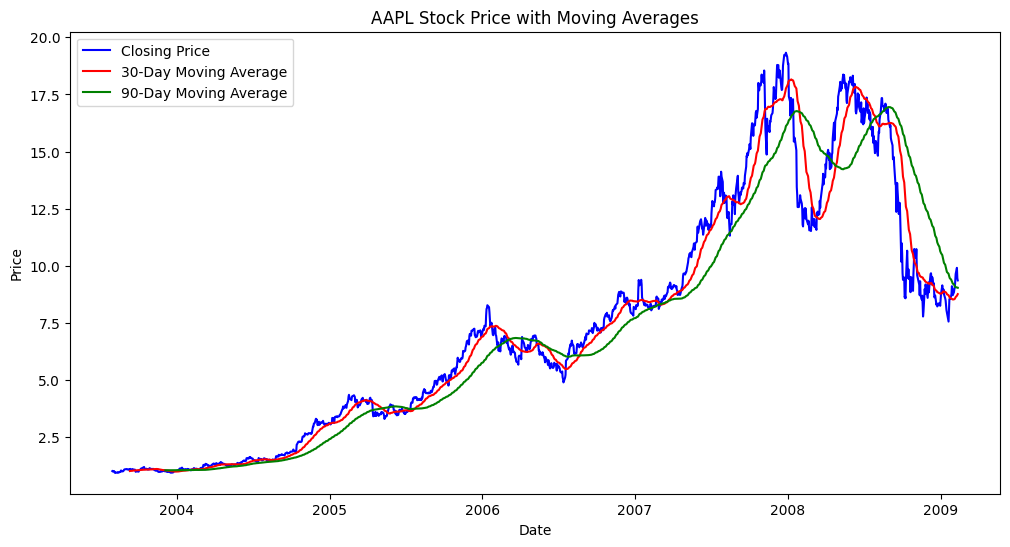

In [10]:
# 5. Calculate and plot moving averages or rolling averages to identify the underlying
# trends and smooth out noise.
df_company['moving_avg_30'] = df_company[company].rolling(window=30).mean()
df_company['moving_avg_90'] = df_company[company].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_company[company], color='blue', label='Closing Price')
plt.plot(df_company['moving_avg_30'], color='red', label='30-Day Moving Average')
plt.plot(df_company['moving_avg_90'], color='green', label='90-Day Moving Average')
plt.title(f"{company} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

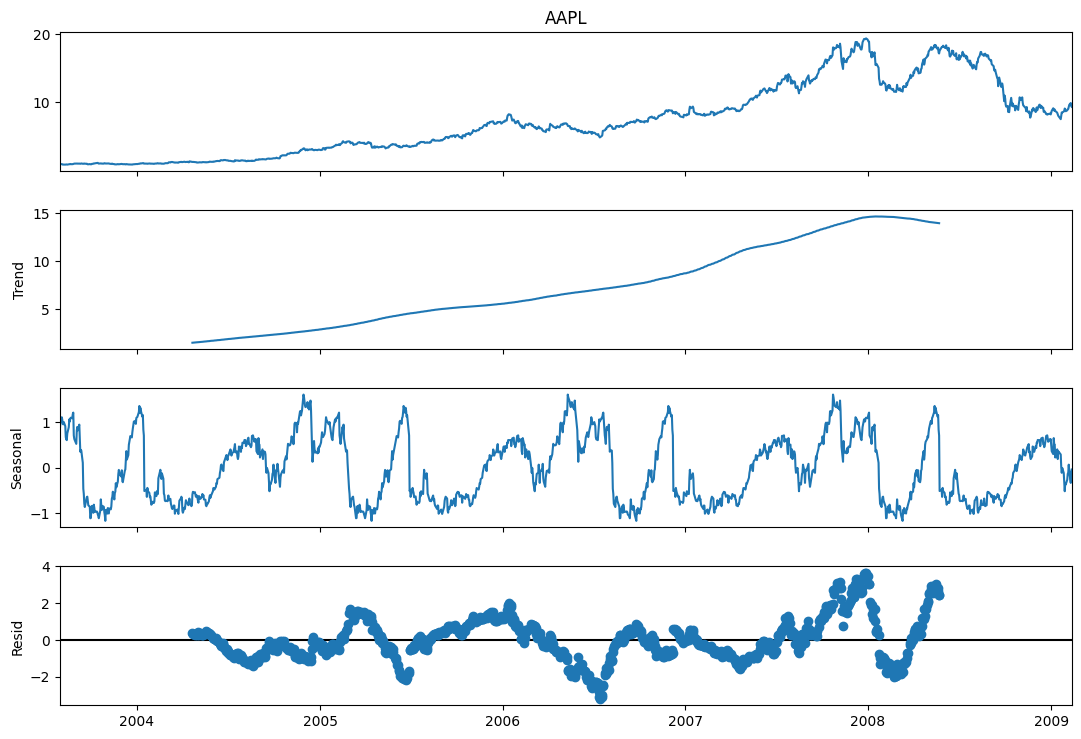

In [11]:
# 6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as
# weekly, monthly, or yearly fluctuations.
decomposition = seasonal_decompose(df_company[company], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

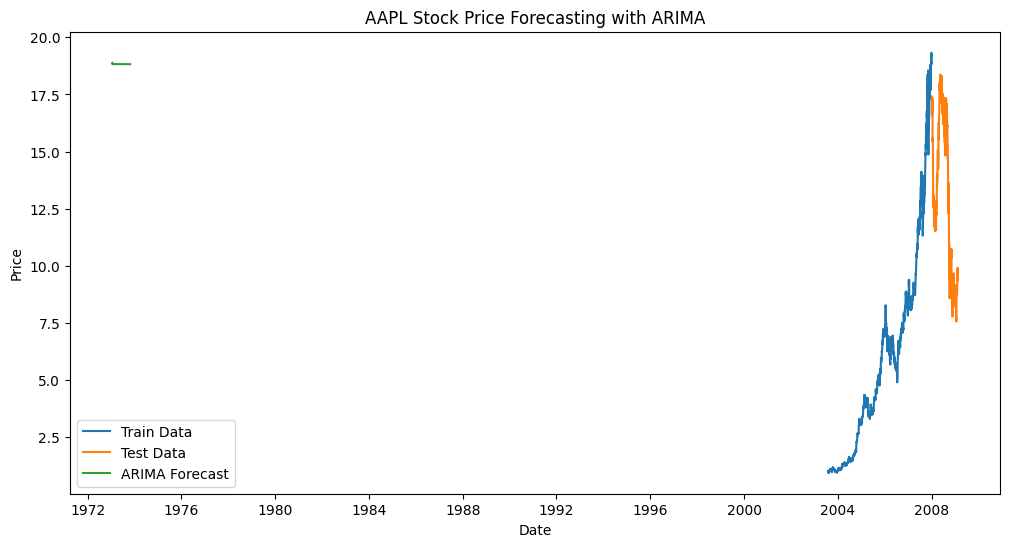

In [12]:
# 7. Analyze and plot the correlation between the stock prices and other variables, such as
# trading volume or market indices.
# 8. Use autoregressive integrated moving average (ARIMA) models or exponential
# smoothing models to forecast future stock prices.
# Split data into training and testing sets
train_data = df_company[company][:int(0.8 * len(df_company))]
test_data = df_company[company][int(0.8 * len(df_company)):]

# Fit ARIMA model (choose order based on model tuning)
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
forecast = arima_fit.forecast(steps=len(test_data))
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Train Data")
plt.plot(test_data, label="Test Data")
plt.plot(forecast, label="ARIMA Forecast")
plt.title(f"{company} Stock Price Forecasting with ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Done